# Daten einlesen

In [3]:
d = read.table("daten16.txt", header=TRUE, sep = "", encoding = "")
summary(d)
str(d)

             Alias            Klarname     Richter       Wuerze    
 B<e4>renzwinger: 6   Bergk<f6>nig:12   Carmen :10   Min.   :1.00  
 Backsteinbau   : 6   Egger       : 6   Martina:10   1st Qu.:2.00  
 Festungsanlage : 6   Hadmar      : 6   Moritz :10   Median :3.00  
 Fischerinsel   : 6   Lammsbr<e4>u: 6   Stefan :10   Mean   :2.95  
 Heizungslabel  : 6   Ottakringer : 6   Stefano:10   3rd Qu.:4.00  
 Linoleum       : 6   Stiegl      : 6   Thomas :10   Max.   :5.00  
 (Other)        :24   (Other)     :18                              
   Geschmack      Sueffigkeit       Geilheit  
 Min.   :2.000   Min.   :1.000   Min.   :1.0  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.0  
 Median :3.000   Median :3.000   Median :3.0  
 Mean   :2.983   Mean   :2.783   Mean   :2.9  
 3rd Qu.:3.000   3rd Qu.:4.000   3rd Qu.:4.0  
 Max.   :5.000   Max.   :5.000   Max.   :5.0  
                                              

'data.frame':	60 obs. of  7 variables:
 $ Alias      : Factor w/ 10 levels "B\xe4renzwinger",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Klarname   : Factor w/ 9 levels "Bergk\xf6nig",..: 1 1 1 1 1 1 5 5 5 5 ...
 $ Richter    : Factor w/ 6 levels "Carmen","Martina",..: 6 4 5 1 3 2 6 4 5 1 ...
 $ Wuerze     : int  3 3 3 3 3 2 3 2 1 4 ...
 $ Geschmack  : int  4 2 3 2 3 3 2 4 2 3 ...
 $ Sueffigkeit: int  3 1 2 1 2 3 3 5 4 4 ...
 $ Geilheit   : int  4 1 2 2 4 3 3 4 2 3 ...


## Biergruppen

In [4]:
Egger = subset(d, Klarname == "Egger")
Ottakringer = subset(d, Klarname == "Ottakringer")
Hadmar = subset(d, Klarname == "Hadmar")
Zipfer = subset(d, Klarname == "Zipfer")
Zwettler = subset(d, Klarname == "Zwettler")
Lammsbräu = subset(d, Klarname == "Lammsbräu")
Stiegl = subset(d, Klarname == "Stiegl")
Wieselburger = subset(d, Klarname == "Wieselburger")
Bergkoenig = subset(d, Klarname == "Der Bergkönig")

## Menschen

In [5]:
Stefan  =    subset(d, Richter == "Stefan")
Carmen  =    subset(d, Richter == "Carmen")
Stefano =   subset(d, Richter == "Stefano")
Martina =   subset(d, Richter == "Martina")
Moritz  =    subset(d, Richter == "Moritz")
Thomas   =     subset(d, Richter == "Thomas")

# Boxplots

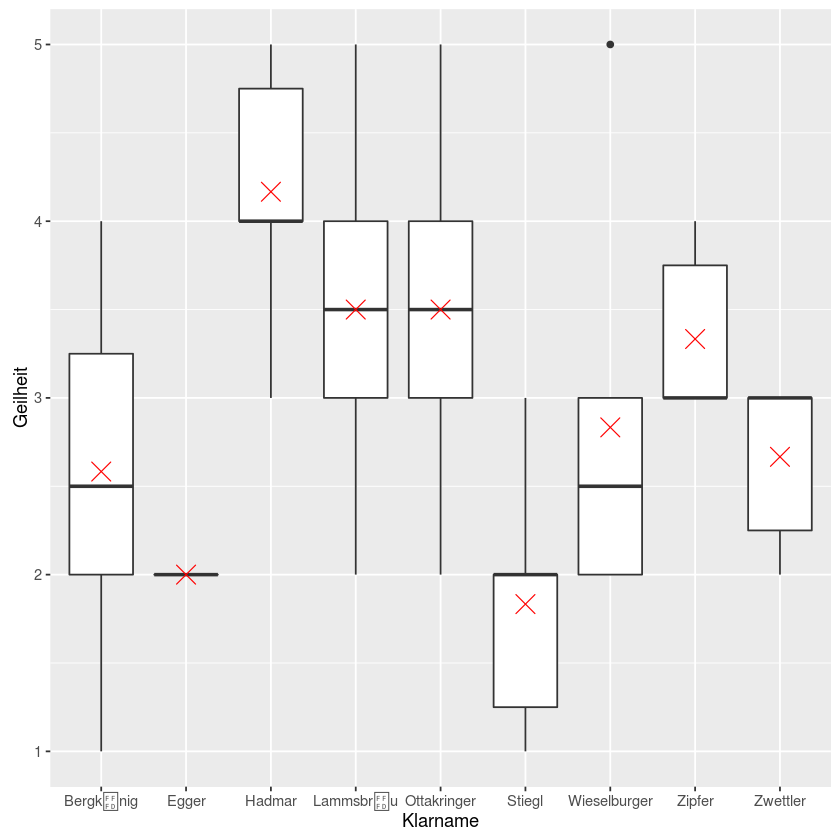

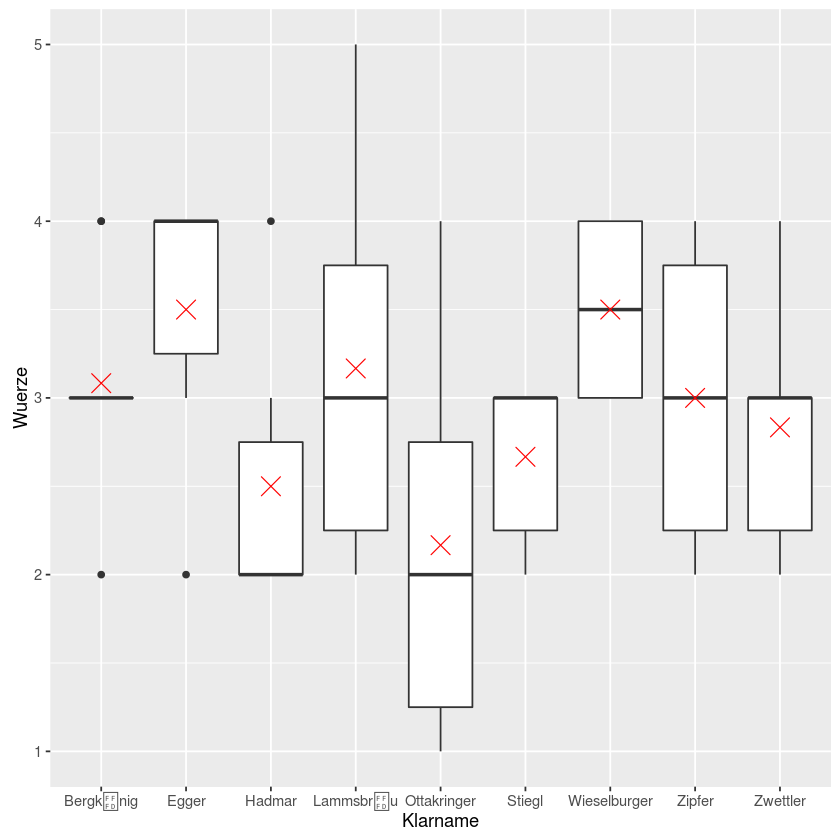

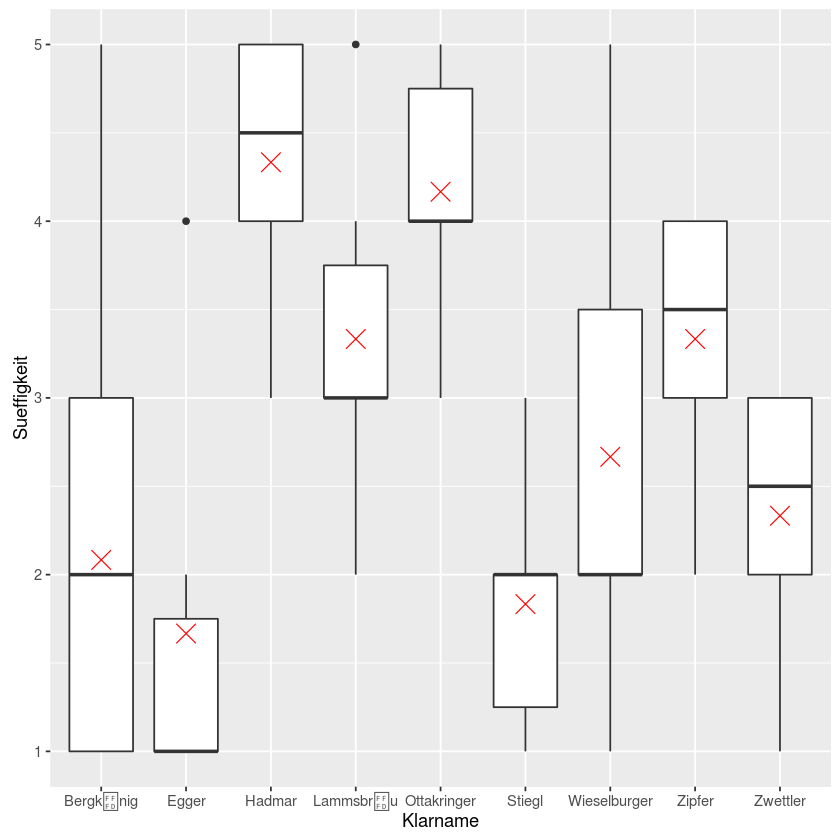

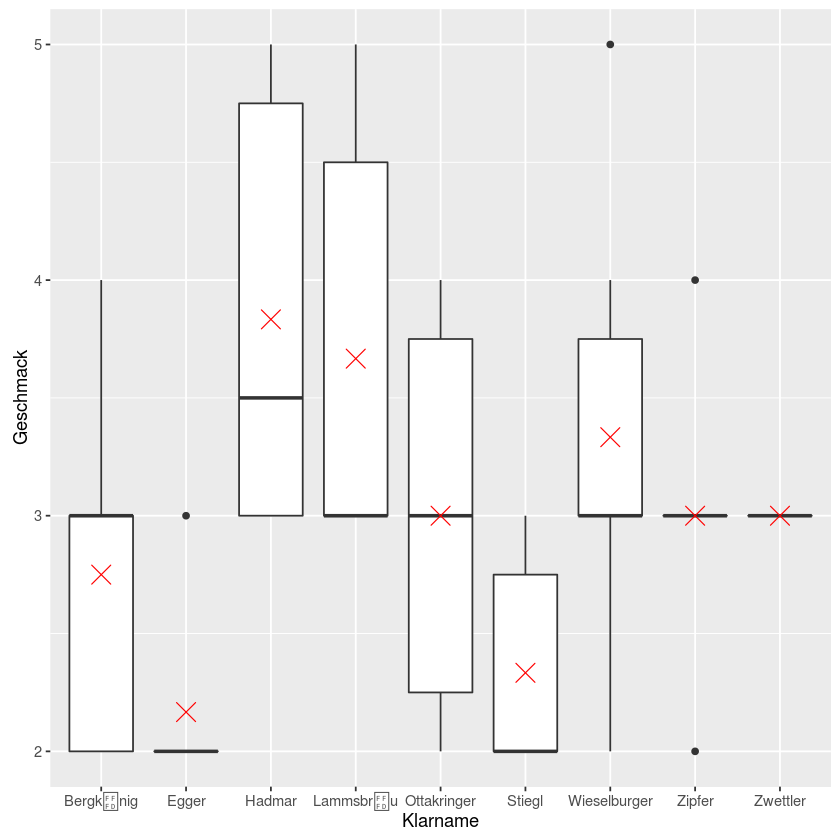

In [6]:
# Geilheit
library("ggplot2")
geil<-qplot(Klarname,Geilheit,data=d,geom='boxplot')
geil<-geil+stat_summary(fun.y=mean,shape=4,col='red',geom="point", size=5)
plot(geil)

#Würze
wuerz<-qplot(Klarname,Wuerze,data=d,geom='boxplot')
wuerz<-wuerz+stat_summary(fun.y=mean,shape=4,col='red',geom="point", size=5)
plot(wuerz)

#Süffigkeit
sueff<-qplot(Klarname,Sueffigkeit,data=d,geom='boxplot')
sueff<-sueff+stat_summary(fun.y=mean,shape=4,col='red',geom="point", size=5)
plot(sueff)

#Geschmack
gesch<-qplot(Klarname,Geschmack,data=d,geom='boxplot')
gesch<-gesch+stat_summary(fun.y=mean,shape=4,col='red',geom="point", size=5)
plot(gesch)

# Linear Model

In [7]:
LinearModel = lm(Geilheit ~ Wuerze + Geschmack + Sueffigkeit, data=d)
LinearModel
summary(LinearModel)


Call:
lm(formula = Geilheit ~ Wuerze + Geschmack + Sueffigkeit, data = d)

Coefficients:
(Intercept)       Wuerze    Geschmack  Sueffigkeit  
    0.45525     -0.03064      0.47129      0.40568  



Call:
lm(formula = Geilheit ~ Wuerze + Geschmack + Sueffigkeit, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5885 -0.2878  0.0673  0.3345  1.4115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.45525    0.39602   1.150  0.25520    
Wuerze      -0.03064    0.10780  -0.284  0.77726    
Geschmack    0.47129    0.14140   3.333  0.00153 ** 
Sueffigkeit  0.40568    0.09645   4.206 9.47e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6096 on 56 degrees of freedom
Multiple R-squared:  0.6912,	Adjusted R-squared:  0.6747 
F-statistic: 41.79 on 3 and 56 DF,  p-value: 2.599e-14


# Personen Geilheit

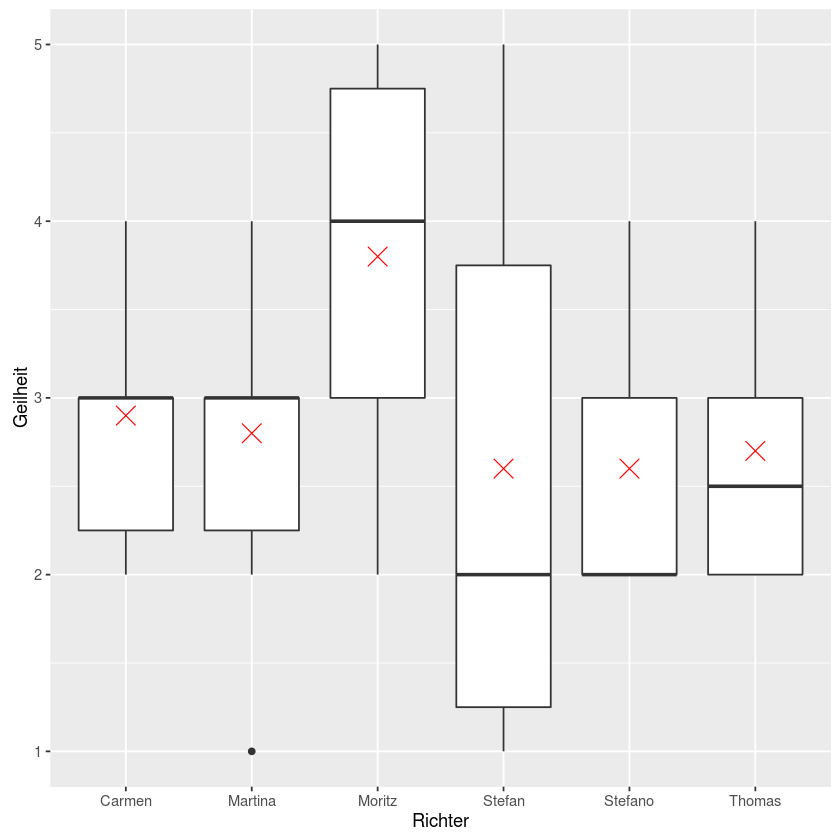

In [8]:
geil2<-qplot(Richter,Geilheit,data=d,geom='boxplot')
geil2<-geil2+stat_summary(fun.y=mean,shape=4,col='red',geom="point", size=5)
plot(geil2)

# Korrelation Kriterien

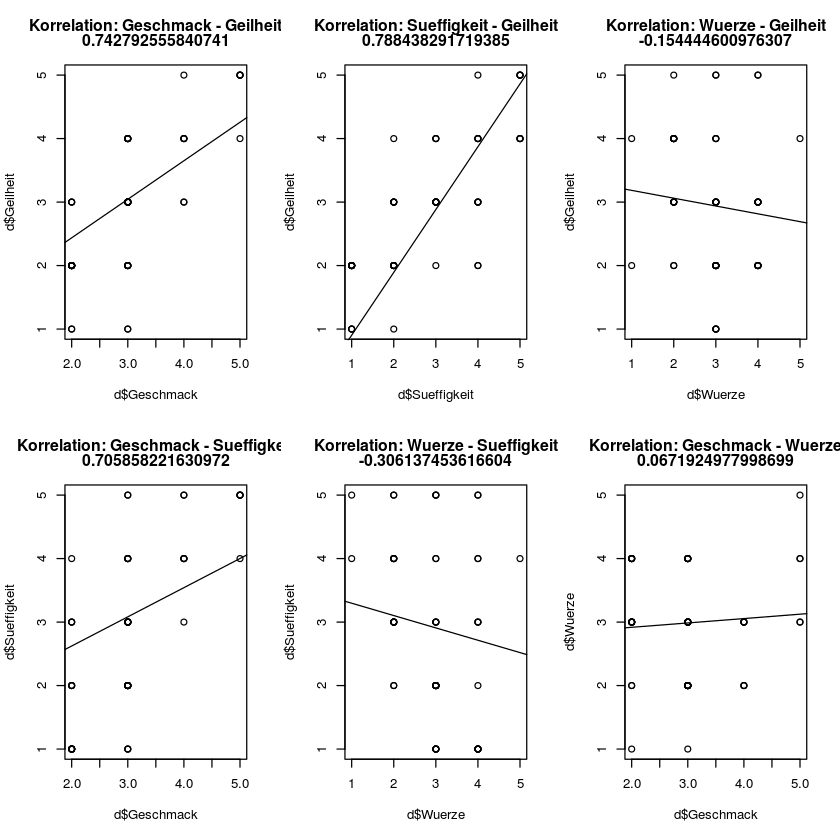

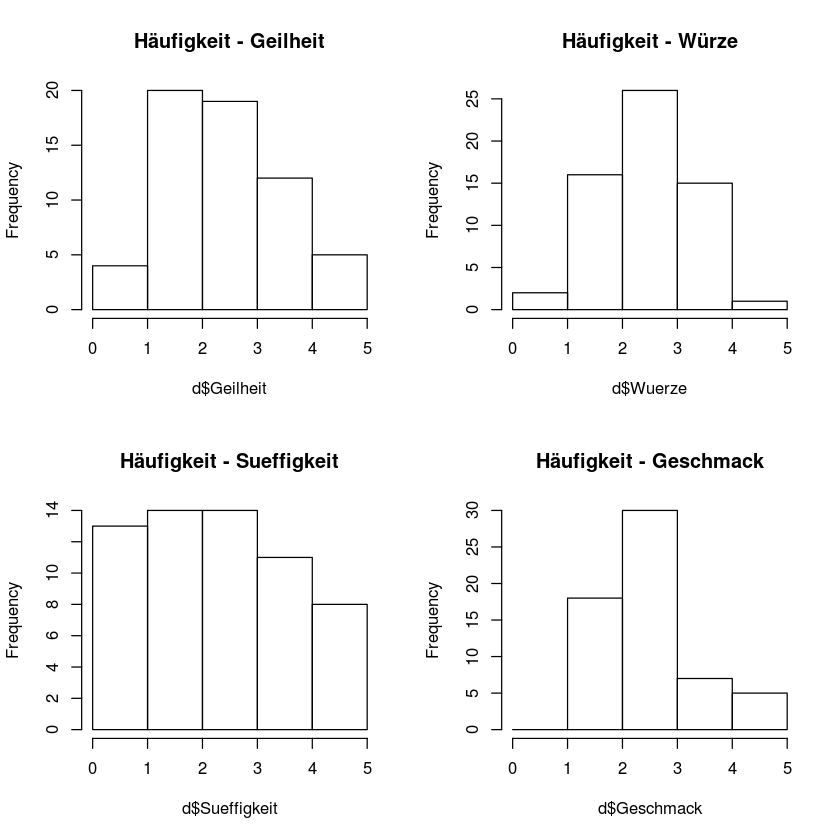

In [9]:
par(mfrow = c(2, 3))

#Trend
plot(d$Geschmack, d$Geilheit, main= c("Korrelation: Geschmack - Geilheit", cor(d$Geschmack, d$Geilheit)))
abline(lm(d$Geschmack ~ d$Geilheit)) 

#Trend
plot(d$Sueffigkeit, d$Geilheit, main=c("Korrelation: Sueffigkeit - Geilheit", cor(d$Sueffigkeit, d$Geilheit)))
abline(lm(d$Sueffigkeit ~ d$Geilheit))

#Trend
plot(d$Wuerze, d$Geilheit, main=c("Korrelation: Wuerze - Geilheit", cor(d$Wuerze, d$Geilheit)))
abline(lm(d$Wuerze ~ d$Geilheit))

#Trend
plot(d$Geschmack, d$Sueffigkeit, main= c("Korrelation: Geschmack - Sueffigkeit", cor(d$Geschmack, d$Sueffigkeit)))
abline(lm(d$Geschmack ~ d$Sueffigkeit))

#Trend
plot(d$Wuerze, d$Sueffigkeit, main= c("Korrelation: Wuerze - Sueffigkeit", cor(d$Wuerze, d$Sueffigkeit)))
abline(lm(d$Wuerze ~ d$Sueffigkeit))

#Trend
plot(d$Geschmack, d$Wuerze, main= c("Korrelation: Geschmack - Wuerze", cor(d$Geschmack, d$Wuerze)))
abline(lm(d$Geschmack ~ d$Wuerze))

#
par(mfrow = c(2, 2))
hist(d$Geilheit, breaks=c(0:5), main="Häufigkeit - Geilheit")
hist(d$Wuerze, breaks=c(0:5), main="Häufigkeit - Würze")
hist(d$Sueffigkeit, breaks=c(0:5), main="Häufigkeit - Sueffigkeit")
hist(d$Geschmack, breaks=c(0:5), main="Häufigkeit - Geschmack")

# Histogramme - Geilheit

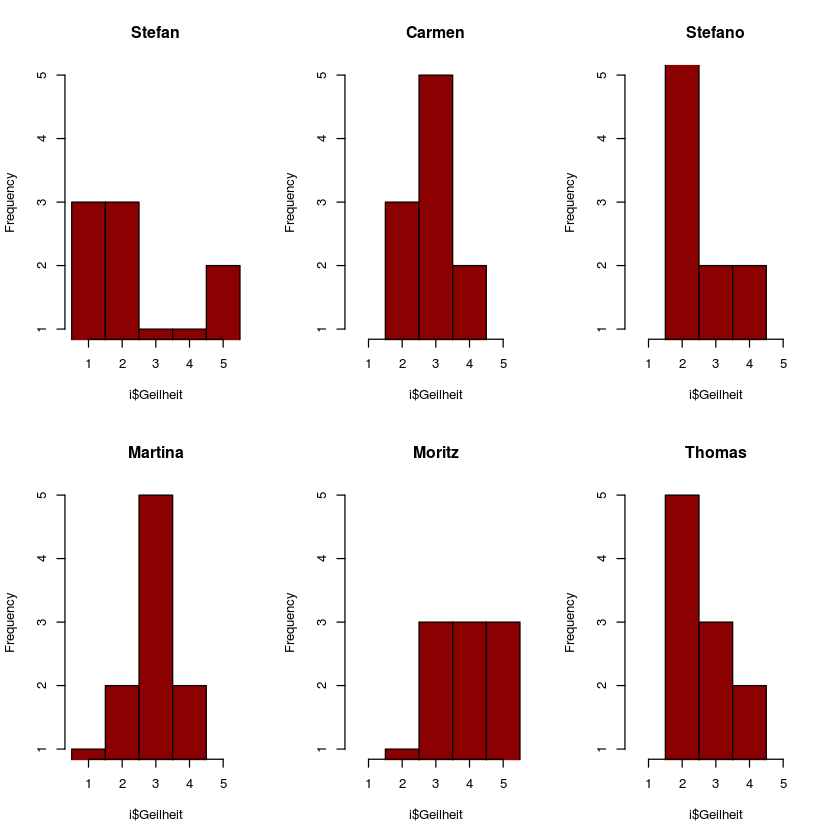

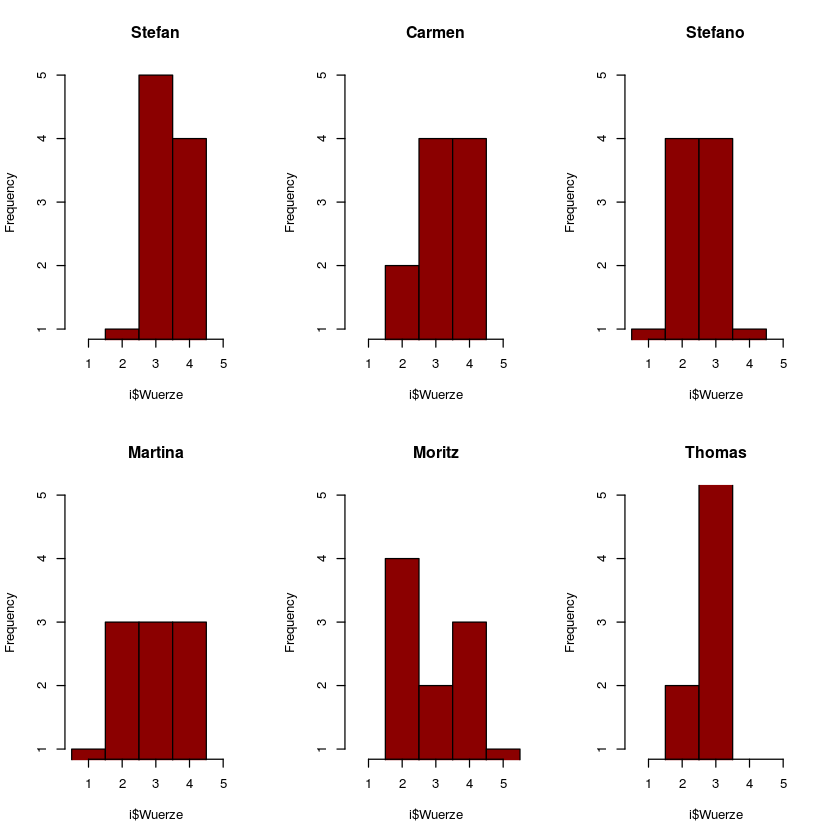

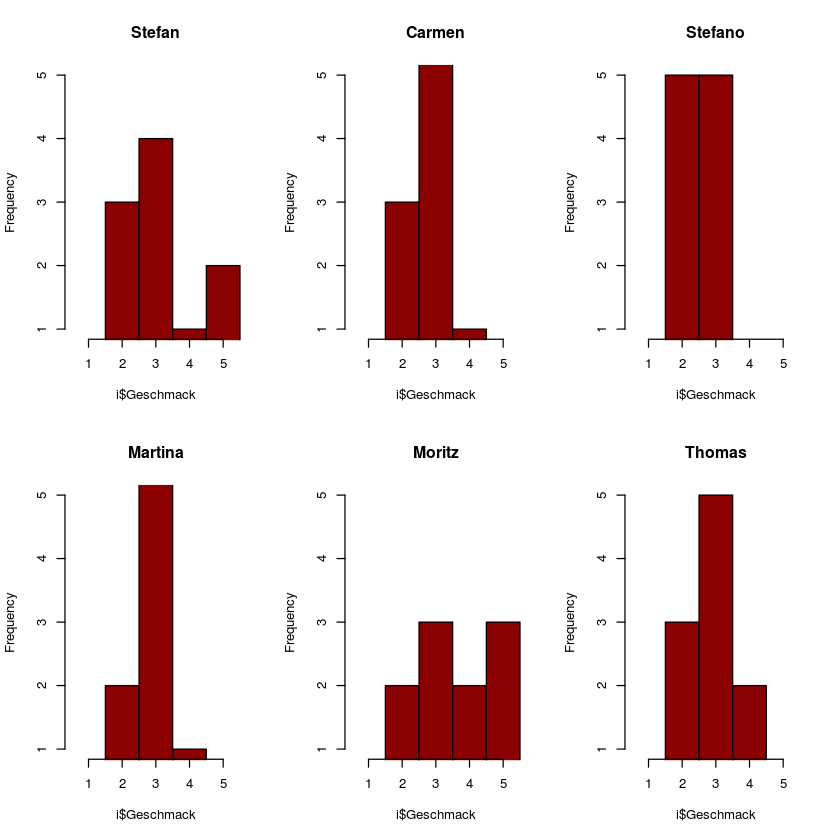

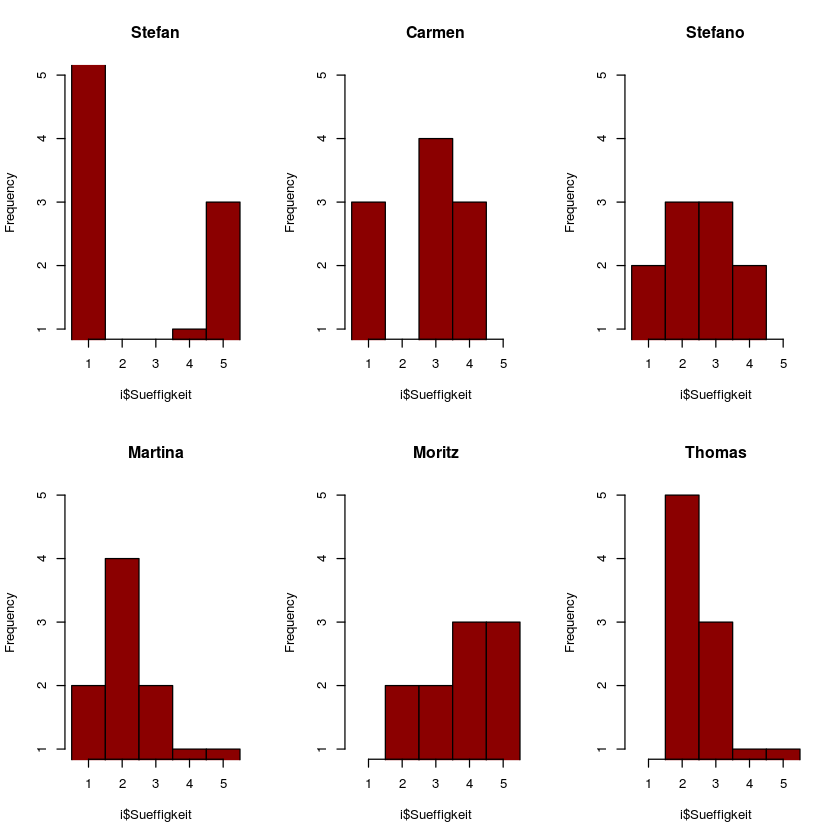

In [10]:
x = seq(1,5,1)
par(mfrow = c(2,3))
namenliste = list(Stefan, Carmen, Stefano, Martina, Moritz, Thomas)
for (i in namenliste){
  hist2=hist(i$Geilheit, breaks=c(0:5), main=i$Richter[1], col="darkred", ylim= c(1,5), xaxt="n")
  axis(1, at=hist2$mids, labels=1:max(x))}

for (i in namenliste){
  hist2=hist(i$Wuerze, breaks=c(0:5), main=i$Richter[1], col="darkred", ylim= c(1,5), xaxt="n")
  axis(1, at=hist2$mids, labels=1:max(x))}

for (i in namenliste){
  hist2=hist(i$Geschmack, breaks=c(0:5), main=i$Richter[1], col="darkred", ylim= c(1,5), xaxt="n")
  axis(1, at=hist2$mids, labels=1:max(x))}

for (i in namenliste){
  hist2=hist(i$Sueffigkeit, breaks=c(0:5), main=i$Richter[1], col="darkred", ylim= c(1,5), xaxt="n")
  axis(1, at=hist2$mids, labels=1:max(x))}

# Entscheidungsbaum

In [11]:
# Formel für Regression
fo = Geilheit ~ Geschmack + Wuerze + Sueffigkeit

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


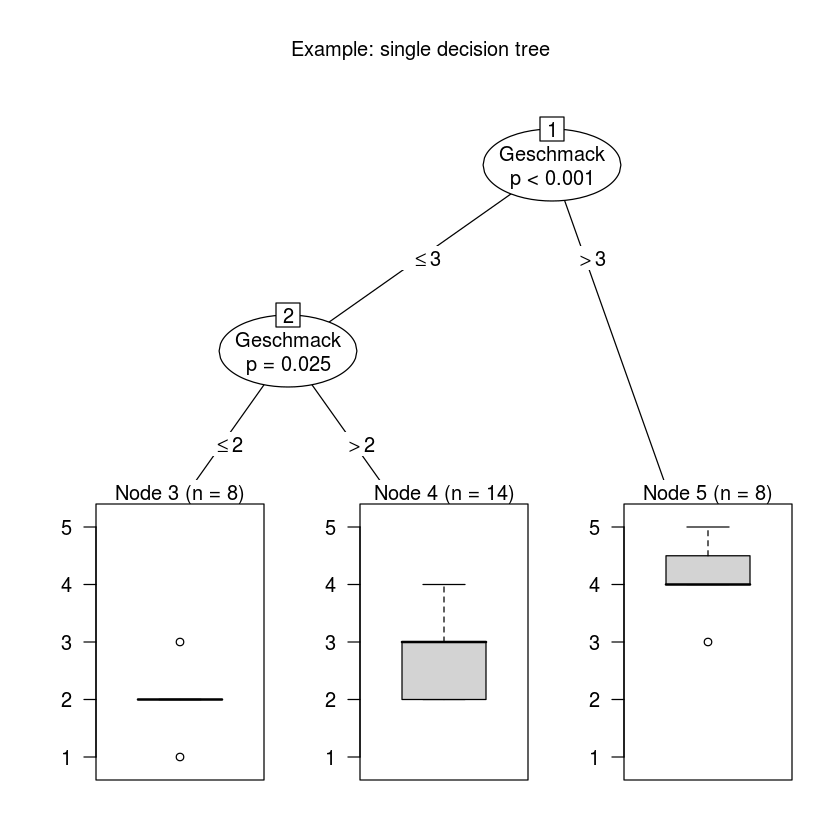

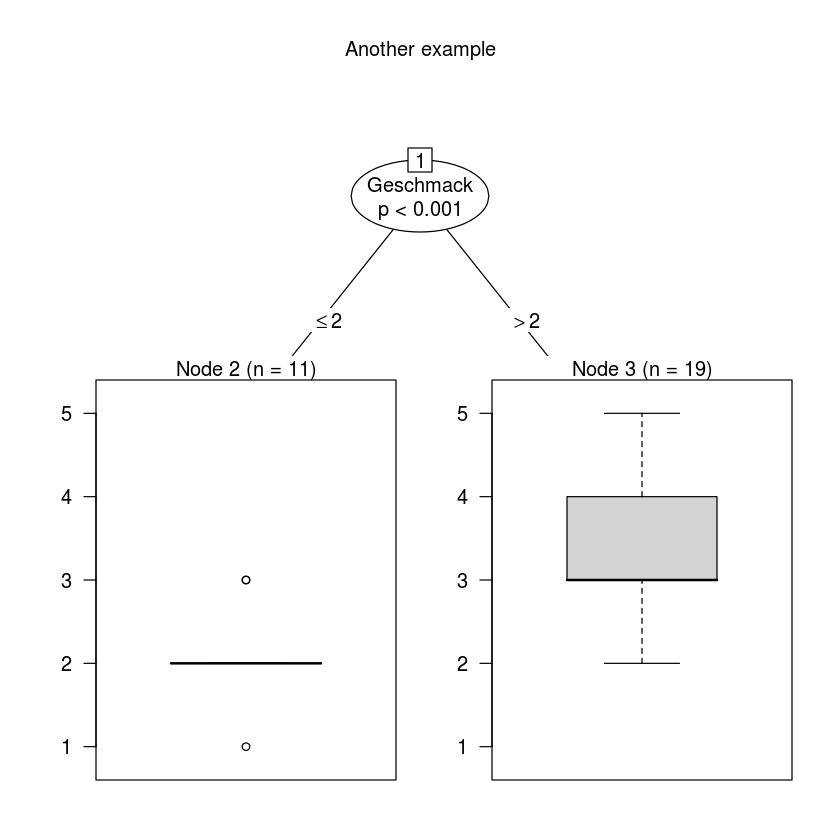

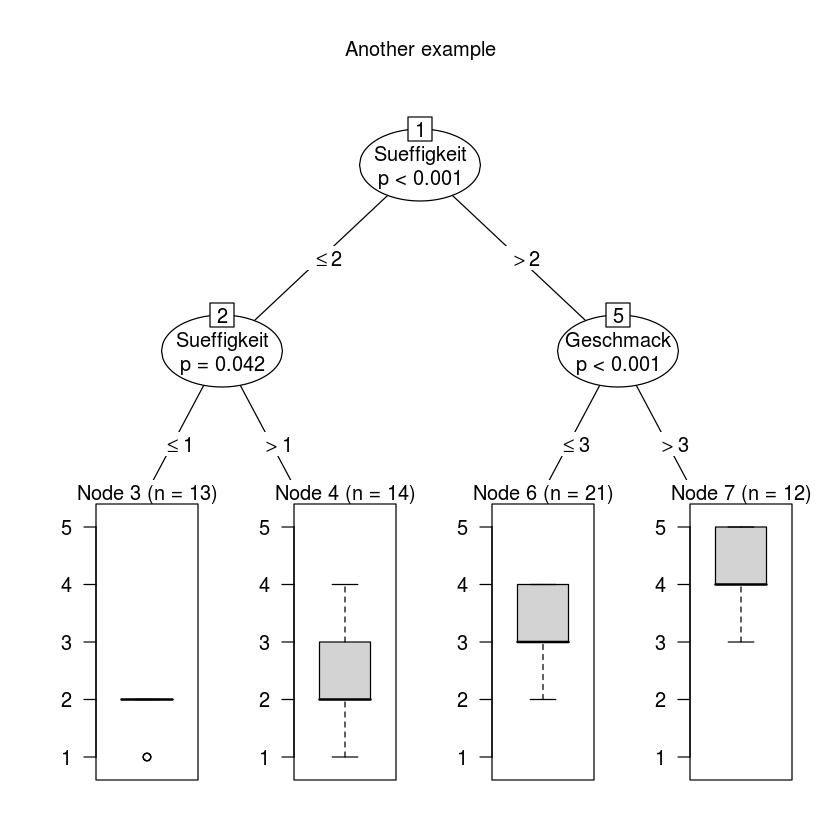

In [12]:
# 
library("party")
set.seed(77)
x <- ctree(fo, data=d[sample(nrow(d), 30), ])
plot(x, main="Example: single decision tree")
set.seed(7)
x <- ctree(fo, data=d[sample(nrow(d), 30), ])
plot(x, main="Another example")
x <- ctree(fo, data=d[sample(nrow(d), 60), ])
plot(x, main="Another example")
#

# Random Forest

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = fo, data = d, importance = TRUE, ntree = 1000,      keep.forest = FALSE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 1

          Mean of squared residuals: 0.422966
                    % Var explained: 62.35

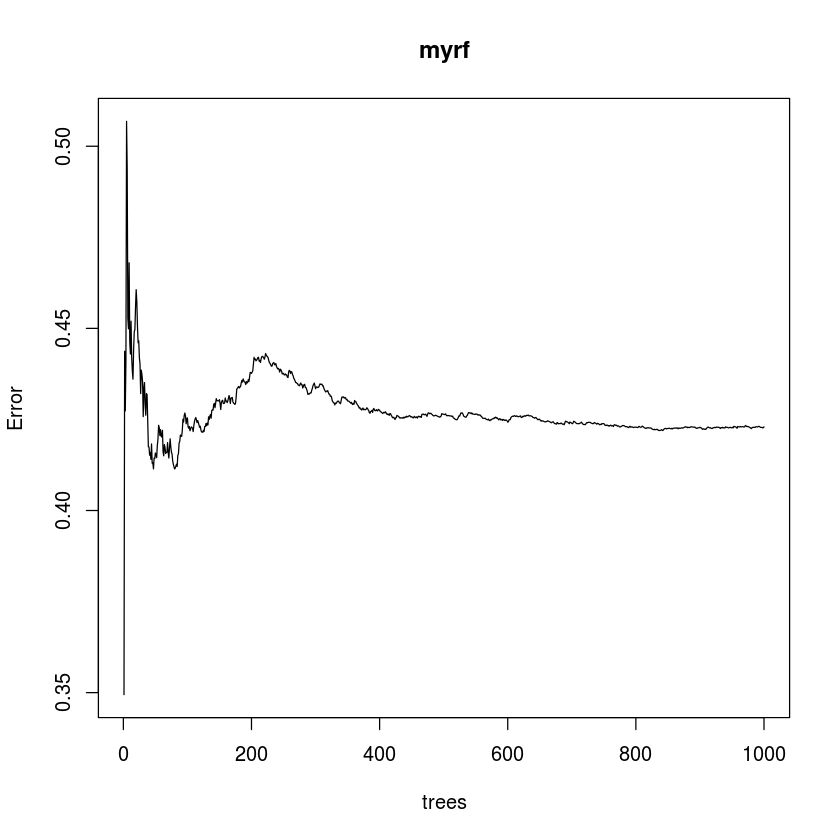

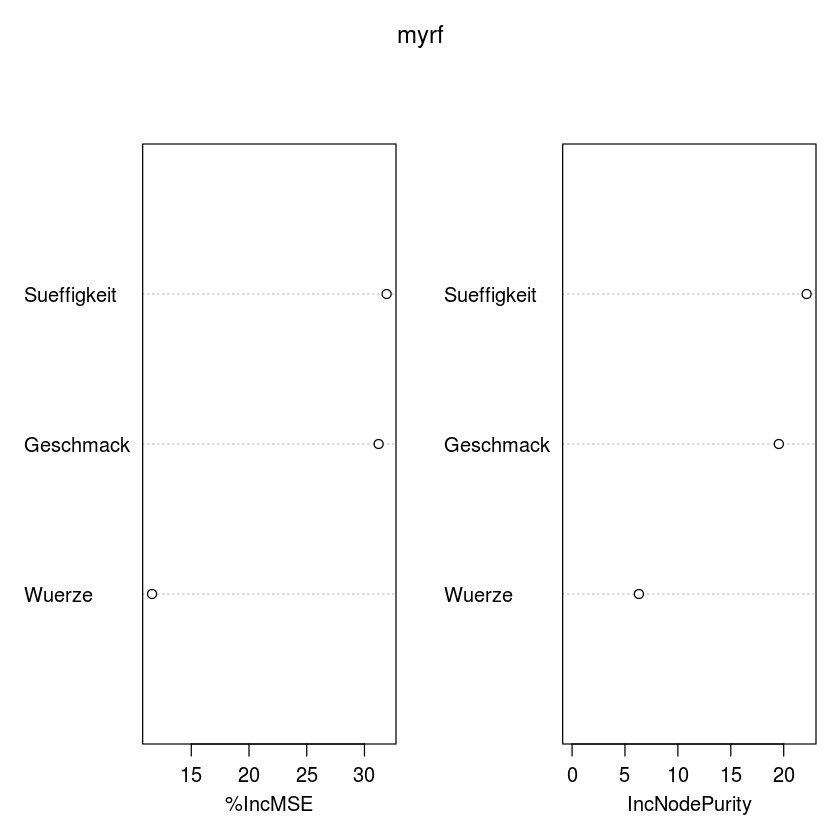

In [13]:
library(randomForest)

set.seed(2)
myrf = randomForest(fo, importance=TRUE, data=d, ntree=1000, keep.forest=FALSE)
par(mfrow = c(1,1))
plot(myrf)
(myrf)
varImpPlot(myrf)

###RANDOM FOREST

#cp: complexity parameter. Any split that does not decrease the overall lack of fit by 
#a factor of cp is not attempted.The main role of this parameter is to save computing time
# by pruning off splits that are obviously not worthwhile. 
# Essentially,the user informs the program that any split which does not improve 
# the fit by cp will likely be pruned off by cross-validation, 
# and that hence the program need not pursue it. 

# Control parameters for rpart:?
#ctrl = rpart.control(cp=0.01)

In [14]:
library("sperrorest")
mypred.rf = function(object, newdata) predict(object, newdata, type="response")#[,2]

# Perform 50-repeated 10-fold non-spatial cross-validation:
my_cv = sperrorest(formula=fo, data=d,
                          model.fun=randomForest, model.args = list(ntree = 1000), pred.fun=mypred.rf, 
                          smp.fun=partition.cv, smp.args=list(repetition = 1:50,nfold=5, set.seed = 2),
                          err.pooled=TRUE, err.unpooled=TRUE) # importance = TRUE --> time constraints
summary(my_cv)

Loading required package: ROCR
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: rpart


ERROR: Error in (function (data, coords = c("x", "y"), nfold = 10, repetition = 1, : unused argument (set.seed = 2)
